 
> IMMAGINI NON A FUOCO 
 
Cartella:  Res_QF_5mm_mrd61_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


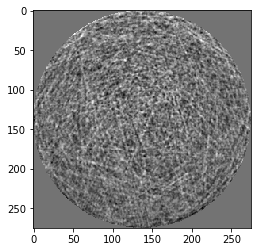

Cartella:  Res_QF_5mm_mrd31_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


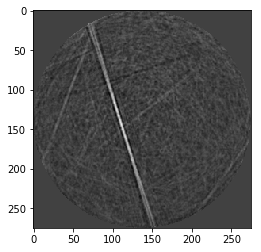

Cartella:  Res_QF_5mm_mrd21_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


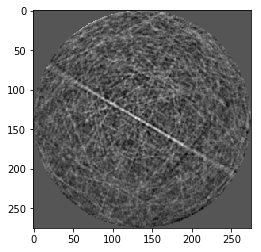

Cartella:  Res_QF_5mm_mrd26_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


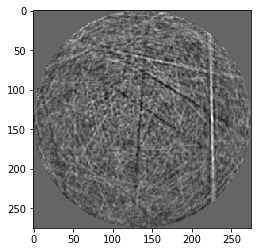

Cartella:  Res_QF_5mm_mrd41_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


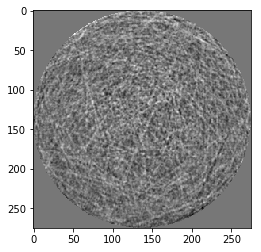

Cartella:  Res_QF_5mm_mrd51_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


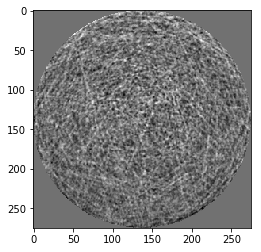

Cartella:  Res_QF_5mm_mrd56_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


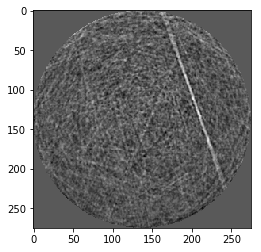

Cartella:  Res_QF_5mm_mrd36_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


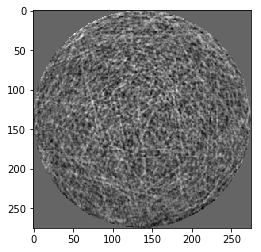

Cartella:  Res_QF_5mm_mrd46_FBP_ITERATIVE
	
File (1) .hdr:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.hdr
File (2) .img:  acqService.FBP-rebin-2-fmax0.8-smt0.5-ham0.7.img
 


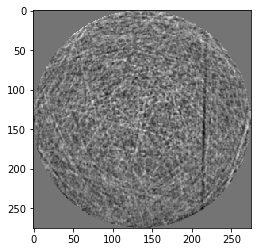

In [23]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imghdr
import os
from numpy import *
from scipy.interpolate import UnivariateSpline
import pylab as pl

dim_x, dim_y, dim_z  = 275 , 275 , 127
dtype = np.dtype(np.float32)

#mode_index = input('modalità di ricostruzione? (ITERATIVE=0, 3DOSEM=1, SSRB=2) ')
mode_index = 0 #int(mode_index)
mode = ['ITERATIVE', '3DOSEM', 'SSRB']

mm = str(5) #input('30 o 5 mm? ')
print(' ')

path = '/home/matteolab/Spatial_Resolution/' + str(mode[mode_index]) + '/' + mm + 'mm/'
#scans = os.listdir(path)

def GetFiles(path):
    files = []
    for item in os.listdir(path): 
        
        for f in os.listdir(path + item):
            files.append(f)
            
    return files

filelist = GetFiles(path)
#lenght= len(filelist)

#index=0
i=1
j=0

imglist = []
#imagexylist = []
hdrlist = []

print('> IMMAGINI NON A FUOCO ')
print(' ')
for item in os.listdir(path): 
    print ('Cartella: ', item)
    
    print('\t')
    for f in os.listdir(path + item):          
        
        if str(f) == filelist[i]:
            
            print ('File (2) .img: ', f)
            print(' ')
            f_img = open(os.path.join(path +item + '/' + f), 'rb')
            data_img = np.fromfile(f_img, dtype)
            image = data_img.reshape((dim_z, dim_y, dim_x))
            #print(image) -> sono 127 vettori bidimensionali (127 immagini)
            #image = np.flip(image, axis = 1)
            
            imglist.append(image)
            
            #plotto l'image [..] di ogni interfile
            imagexy = image[50]
            #imagexylist.append(imagexy)
            plt.clf()
            plt.imshow(imagexy, cmap = "gray") #max127
            plt.show()
            #plt.savefig()
            f_img.close()
            i += 2
            #index+=1
            
        elif str(f) == filelist[j]:
            
            print ('File (1) .hdr: ', f)
            f_hdr= open(os.path.join(path +item + '/' + f), 'r')
            hdrlist.append(f_hdr)
            
            datahdr = f_hdr.read()
            #print('hdr numero ', int(j/2), ': ', datahdr)
            f_hdr.close()
            j+=2                

In [24]:
for n in range(0,len(imglist)):
    #somma i vari array di ogni set di proiezioni (9 set)
    #trovo l'array con valori più alti (ad esempio il 93)
    #argmax non ritorna il valore ma la posizione
    
    index_z = np.argmax(np.sum (np.sum(imglist[n] , axis=1) , axis=1)) #1 1
    #print('index_z', n ,': ',index_z) 

print('index_z' ,': ',index_z)

for n in range(0,len(imglist)):
    #prima sommo ogni elemento delle diverse righe, quindi ottengo un array con len = 127
    #poi trovo la riga più intensa sommando tutti gli elementi tra di loro (trovo l'indice)
    
    index_x = np.argmax(np.sum (np.sum(imglist[n] , axis=0) , axis=1)) # 0 1  
    #print('index_x', n ,': ',index_x) 
    
print('index_x' ,': ',index_x)

for n in range(0,len(imglist)):
    #primo step come prima
    #poi trovo la colonna più intensa (trovo l'indice)
    
    index_y = np.argmax(np.sum (np.sum(imglist[n] , axis=0) , axis=0)) # 0 0
    #print('index_y', n ,': ',index_y) 

print('index_y' ,': ',index_y)

index_z :  93
index_x :  115
index_y :  137


> IMMAGINI A FUOCO, con indice z: 93
 
Immagine 0


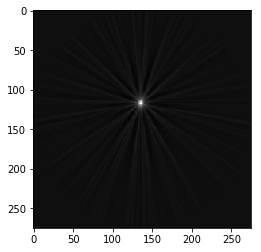

Immagine 1


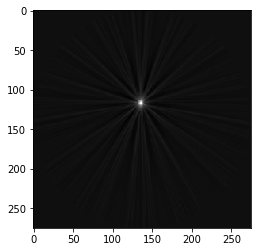

Immagine 2


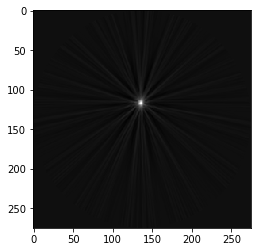

Immagine 3


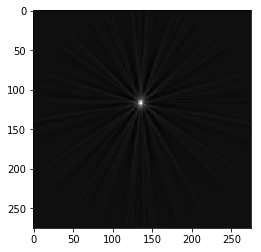

Immagine 4


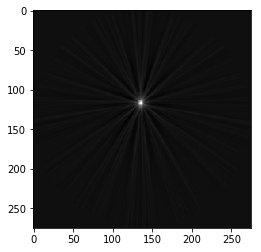

Immagine 5


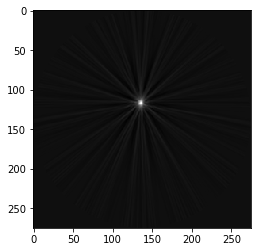

Immagine 6


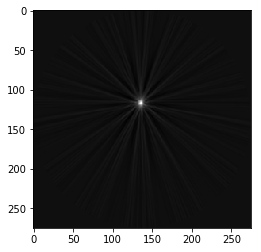

Immagine 7


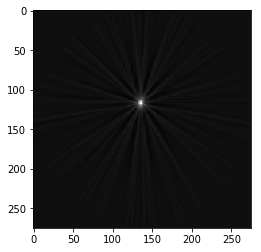

Immagine 8


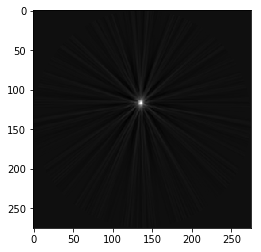

In [25]:
print('> IMMAGINI A FUOCO, con indice z:', index_z)
print(' ')

for m in range(0,len(imglist)):
        print('Immagine', m)
        image_to_print = imglist[m][index_z]
        plt.imshow(image_to_print, cmap = "gray") #max127
        plt.show()         

In [26]:
def my_fw_calc(intensity, max_index, max_value, fraction):
    
    t = max_value * fraction
    #print(' ')
    
    X_l_upper = min(argwhere(intensity > t))
    Y_l_upper = intensity[X_l_upper]
    #print('X_l_upper:',X_l_upper)#indice appena sopra la metà a sx
    #print('Y_l_upper:',Y_l_upper)#valore appena sopra la metà a sx
    
    X_l_lower = X_l_upper - 1
    Y_l_lower = intensity[X_l_lower]
    #print('X_l_lower:',X_l_lower)#indice appena sotto la metà a sx
    #print('Y_l_lower:',Y_l_lower)#valore appena sotto la metà a sx
    
    X_r_upper = max(argwhere(intensity > t))
    Y_r_upper = intensity[X_r_upper]
    #print('X_r_upper:',X_r_upper)#indice appena sopra la metà a dx
    #print('Y_r_upper:',Y_r_upper)#valore appena sopra la metà a dx
    
    X_r_lower = X_r_upper + 1 
    Y_r_lower = intensity[X_r_lower]
    #print('X_r_lower:',X_r_lower)#indice appena sotto la metà a dx
    #print('Y_r_lower:',Y_r_lower)#valore appena sotto la metà a dx
    
    def f_line_l(y):
        return( (X_l_upper - X_l_lower)/(Y_l_upper - Y_l_lower)*(y - Y_l_lower) + X_l_lower)
    
    def f_line_r(y):
        return((X_r_upper - X_r_lower)/(Y_r_upper - Y_r_lower)*(y - Y_r_lower) + X_r_lower)
    
    left_point = f_line_l(t)
    right_point = f_line_r(t)
    
    #print(' ')
    #print('left_point, right_point:', left_point, right_point)
    difference = right_point - left_point
    #print(' ')
    
    return(difference, t)  

In [27]:
#Scales convert from pixels to mm
scale_x = 0.2937
scale_y = 0.2937
scale_z = 0.775

def main_ris(imglistn):
    
    global string_id
    
    ImageZ = imglistn[index_z , : , :] #la 93esima slice
    ImageX = imglistn[: , index_x , :] #la 115esima riga di tutte le 127 slice (sono 127 righe)
    ImageY = imglistn[: , : , index_y] #la 137esima colonna di tutte le 127 slice (sono 127 colonne)
    
   #px, py, pz is middle point in intensity plot
    #Change x and y so that x corresponds to radial
    #direction and y to tangential direction
    px = int(index_y)
    py = int(index_x)
    pz = int(index_z)

    #Box size, length of sides, l
    l = 53;

    sxy=int(py - l/2)
    dxy=int(py + l/2)
    
    sxx=int(px - l/2)
    dxx=int(px + l/2)

    #Values inside box in maximum xy-plane and zy-plane
    #ImageZ è un array
    intensityValue = ImageZ[sxy:dxy , sxx:dxx]; #xy plane ->  posizioni in imageZ intorno a py e px 
    #print(intensityValue)
    intensityValueZ = ImageY[: , sxy:dxy]; #zy plane -> in tutte le proiezioni mi metto attorno a py
    #oppure avrei potuto fare intensityValueZ = ImageX[:, sxx:dxx]
    #intensityValueZ.shape è (127, 50) sono 127 volte 50 elementi (le colonne intorno al max)

    #Get intensity profile in x-, y- and z-direction
    intensityX = np.sum(intensityValue , axis=0) #sommo per avere una proiezione del segnale sulle x
    intensityY = np.sum(intensityValue , axis=1) #sommo per avere una proiezione del segnale sulle y
    #print(intensityY)
    intensityZ = np.sum(intensityValueZ , axis=1) #sommo tutte le colonne intorno al massimo 
                                                  #per avere un'unico array lungo Z (array (127,))

    #Parabolic fit using the peak point and its two nearest
    #neighboring points, to find the maximum value.
    
    #trovo il massimo di tutto
    Xtopp = argmax(intensityX) #24
    #print('Xtopp: ', Xtopp)
    Ytopp = argmax(intensityY) #26
    #print('Ytopp: ', Ytopp)
    Ztopp = argmax(intensityZ) #93 
    #print('Ztopp: ', Ztopp)
    #print(' ')
    
    Xrange = arange(Xtopp-1 , Xtopp+2) #[23, 24, 25], centrato in 24 (Xtopp) con 2 elementi vicini
    Yrange = arange(Ytopp-1 , Ytopp+2)
    Zrange = arange(Ztopp-1 , Ztopp+2)

    Xpeak = intensityX[Xrange] #ritorna i valori alle posizioni [23, 24, 25]
    Ypeak = intensityY[Yrange]
    Zpeak = intensityZ[Zrange]
    
    Xrangetot = arange(int(Xtopp-l/2+2) , int(Xtopp+l/2-2)) #[23, 24, 25], centrato in 24 (Xtopp) con 2 elementi vicini
    Yrangetot = arange(int(Ytopp-l/2+2) , int(Ytopp+l/2-2))
    Zrangetot = arange(int(Ztopp-l/2+2) , int(Ztopp+l/2-2))
    
    Xpeaktot = intensityX[Xrangetot] #ritorna i valori alle posizioni [23, 24, 25]
    Ypeaktot = intensityY[Yrangetot]
    Zpeaktot = intensityZ[Zrangetot]
    
    Xp = np.polyfit(Xrange, Xpeak, 2) #fit polinomiale di grado 2, ritorna i coefficienti 
                                      #del polinomio, il grado più alto primo
    #print('Xp (coeff): ', Xp)         
    
    def fx(x):
        return(Xp[0]*x**2 + Xp[1]*x + Xp[2])
   
    Yp = np.polyfit(Yrange, Ypeak, 2)
    #print('Yp (coeff): ', Yp)
    
    def fy(x):
        return(Yp[0]*x**2 + Yp[1]*x + Yp[2])
    
    Zp = np.polyfit(Zrange, Zpeak, 2)
    #print('Zp (coeff): ', Zp)
    
    def fz(x):
        return(Zp[0]*x**2 + Zp[1]*x + Zp[2])
        
    print(' ')

    #> X
    
    plt.clf()
    #trovo il massimo del polinomio tramite derivata
    X_der = polyder(Xp);
    X_root_idx = roots(X_der);
    X_max = polyval(Xp , X_root_idx); #trovo l'effettivo valore inserendo nel polinomio la soluzione di massimo
    #print('X_der: ' , X_der)
    #print('X_Root: ' , X_root_idx)
    #print('X_max: ' , X_max)
    
    X = np.linspace(X_root_idx-1,X_root_idx+1,1000)
    plt.plot(Xrangetot, Xpeaktot)
    plt.plot(X,fx(X), color='r')
    plt.axhline(y=my_fw_calc(intensityX, Xtopp, X_max, 0.5)[1], color='g', linestyle='--')
    #plt.axhline(y=my_fw_calc(intensityX, Xtopp, X_max, 0.1)[1], color='g', linestyle='--')
    plt.title('X profile of ' + string_id)
        
    fwhm_x = my_fw_calc(intensityX, Xtopp, X_max, 0.5)[0] * scale_x
    print('fwhm_x :', fwhm_x)
    
    fwtm_x = my_fw_calc(intensityX, Xtopp, X_max, 0.1)[0] * scale_x
    print('fwtm_x :', fwtm_x)
    
    plt.show()
    
    #> Y
    
    Y_der = polyder(Yp);
    Y_root_idx = roots(Y_der);
    Y_max = polyval(Yp , Y_root_idx);
    #print('Y_der: ' , Y_der)
    #print('Y_Root: ' , Y_root_idx)
    #print('Y_max: ' , Y_max)
    
    Y = np.linspace(Y_root_idx-1,Y_root_idx+1,1000)
    plt.plot(Yrangetot, Ypeaktot)
    plt.plot(Y,fy(Y), color='r')
    plt.axhline(y=my_fw_calc(intensityY, Ytopp, Y_max, 0.5)[1], color='g', linestyle='--')
    #plt.axhline(y=my_fw_calc(intensityY, Ytopp, Y_max, 0.1)[1], color='g', linestyle='--')
    plt.title('Y profile of ' + string_id)
       
    fwhm_y = my_fw_calc(intensityY, Ytopp, Y_max, 0.5)[0] * scale_y
    print('fwhm_y :', fwhm_y)
    
    fwtm_y =  my_fw_calc(intensityY, Ytopp, Y_max, 0.15)[0] * scale_y #ATTENZIONE
    print('fwtm_y :', fwtm_y)
    
    plt.show()
    
    #> Z
    
    Z_der = polyder(Zp);
    Z_root_idx = roots(Z_der);
    Z_max = polyval(Zp , Z_root_idx);
    #print('Z_der: ' , Z_der)
    #print('Z_Root: ' , Z_root_idx)
    #print('Z_max: ' , Z_max)
    
    Z = np.linspace(Z_root_idx-1,Z_root_idx+1,1000)
    plt.plot(Zrangetot, Zpeaktot)
    plt.plot(Z,fz(Z), color='r')
    plt.axhline(y=my_fw_calc(intensityZ, Ztopp, Z_max, 0.5)[1], color='g', linestyle='--')
    #plt.axhline(y=my_fw_calc(intensityZ, Ztopp, Z_max, 0.1)[1], color='g', linestyle='--')
    plt.title('Z profile of ' + string_id)
    
    
    fwhm_z = my_fw_calc(intensityZ, Ztopp, Z_max, 0.5)[0] * scale_z
    print('fwhm_z :', fwhm_z)
    
    fwtm_z = my_fw_calc(intensityZ, Ztopp, Z_max, 0.1)[0] * scale_z
    print('fwtm_z :', fwtm_z)
    
    plt.show()
    
    
    a = np.append([[indice_mrd], [fwhm_x], [fwhm_y], [fwhm_z], [fwtm_x], [fwtm_y]], [fwtm_z], axis=0) #lo voglio array
    lista_fw.append(a)
    
    
    return(fwhm_x, fwhm_y, fwhm_z, fwtm_x, fwtm_y, fwtm_z) #3 array

> SET NUMBER 0 : Res_QF_5mm_mrd61_FBP_ITERATIVE
> MRD : 61
 
 
fwhm_x : [1.67516787]
fwtm_x : [6.12585168]


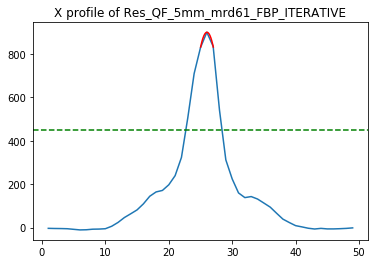

fwhm_y : [2.68544993]
fwtm_y : [5.57628541]


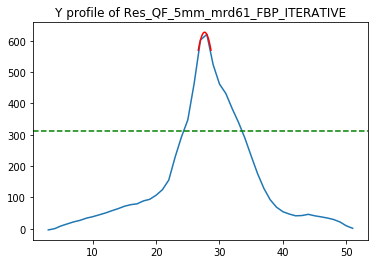

fwhm_z : [2.2792767]
fwtm_z : [4.41322503]


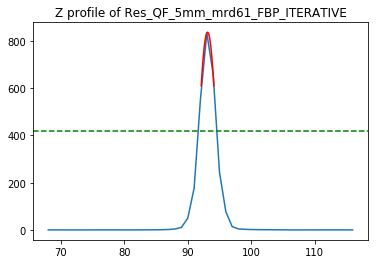

> SET NUMBER 1 : Res_QF_5mm_mrd31_FBP_ITERATIVE
> MRD : 31
 
 
fwhm_x : [1.66647611]
fwtm_x : [6.09850115]


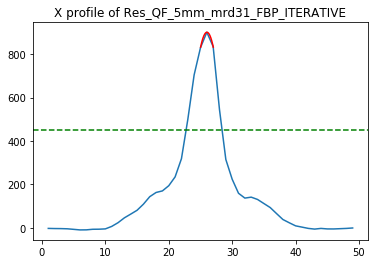

fwhm_y : [2.70028157]
fwtm_y : [5.63093314]


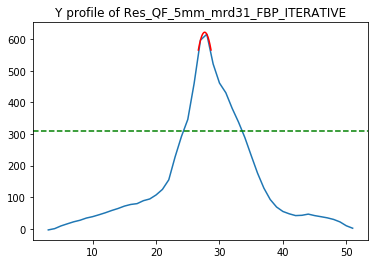

fwhm_z : [2.28603869]
fwtm_z : [4.46264539]


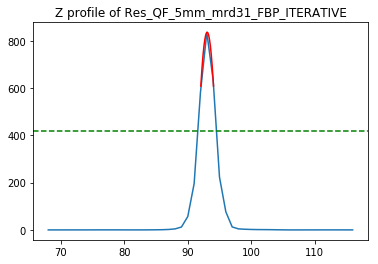

> SET NUMBER 2 : Res_QF_5mm_mrd21_FBP_ITERATIVE
> MRD : 21
 
 
fwhm_x : [1.64817635]
fwtm_x : [5.95314593]


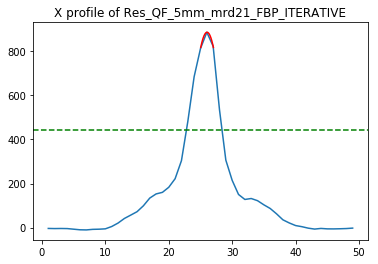

fwhm_y : [2.71757433]
fwtm_y : [5.60634088]


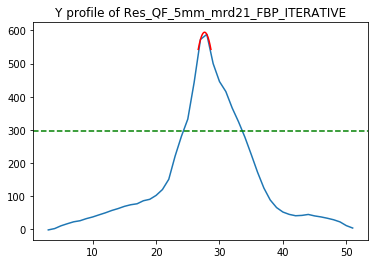

fwhm_z : [2.28076767]
fwtm_z : [4.47053547]


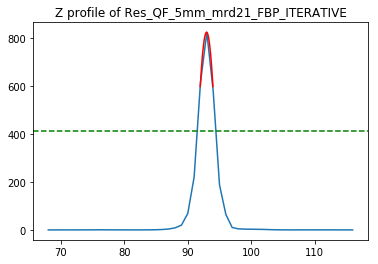

> SET NUMBER 3 : Res_QF_5mm_mrd26_FBP_ITERATIVE
> MRD : 26
 
 
fwhm_x : [1.66249273]
fwtm_x : [6.07751171]


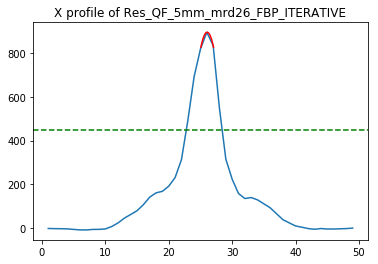

fwhm_y : [2.71834484]
fwtm_y : [5.59667204]


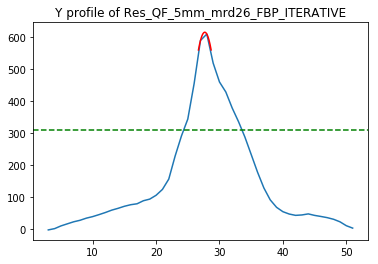

fwhm_z : [2.29231495]
fwtm_z : [4.48404181]


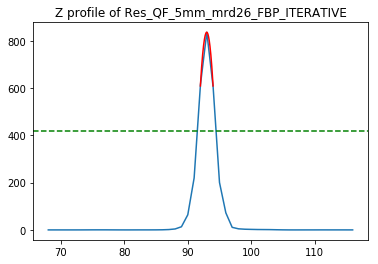

> SET NUMBER 4 : Res_QF_5mm_mrd41_FBP_ITERATIVE
> MRD : 41
 
 
fwhm_x : [1.67564934]
fwtm_x : [6.12763628]


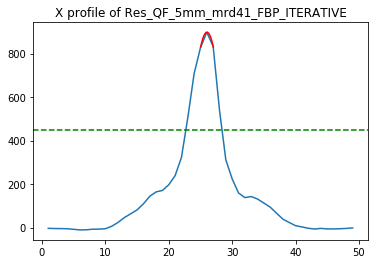

fwhm_y : [2.68449793]
fwtm_y : [5.57331987]


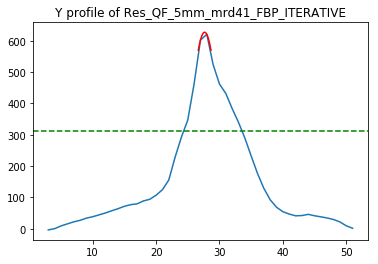

fwhm_z : [2.28033186]
fwtm_z : [4.41578223]


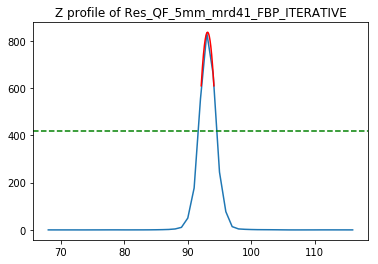

> SET NUMBER 5 : Res_QF_5mm_mrd51_FBP_ITERATIVE
> MRD : 51
 
 
fwhm_x : [1.67516671]
fwtm_x : [6.12585428]


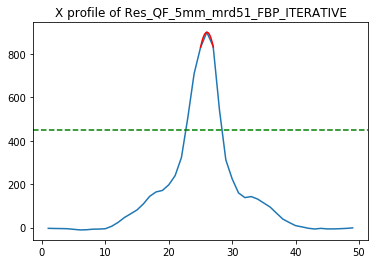

fwhm_y : [2.68545505]
fwtm_y : [5.57616983]


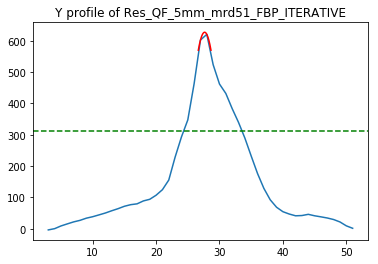

fwhm_z : [2.27927809]
fwtm_z : [4.41322689]


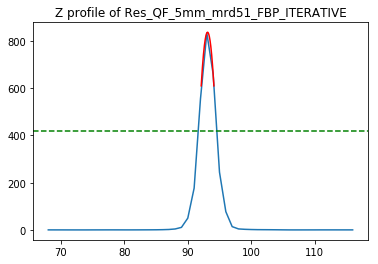

> SET NUMBER 6 : Res_QF_5mm_mrd56_FBP_ITERATIVE
> MRD : 56
 
 
fwhm_x : [1.67516391]
fwtm_x : [6.12584759]


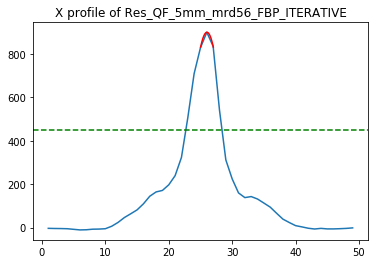

fwhm_y : [2.68541939]
fwtm_y : [5.57618898]


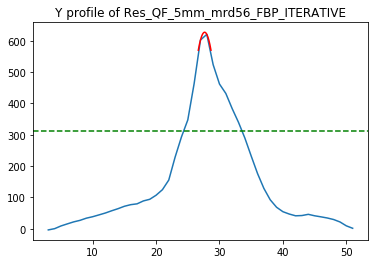

fwhm_z : [2.2792709]
fwtm_z : [4.41319967]


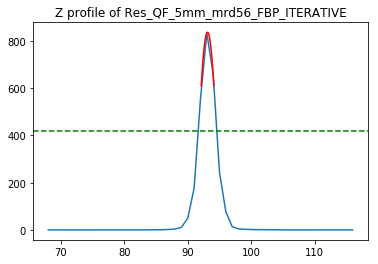

> SET NUMBER 7 : Res_QF_5mm_mrd36_FBP_ITERATIVE
> MRD : 36
 
 
fwhm_x : [1.67364671]
fwtm_x : [6.10843336]


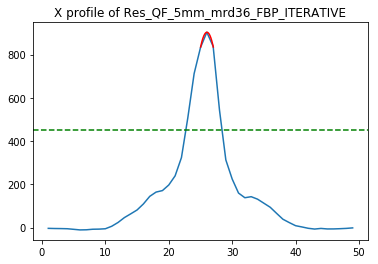

fwhm_y : [2.6867843]
fwtm_y : [5.59583263]


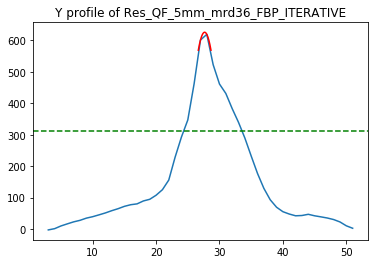

fwhm_z : [2.28602797]
fwtm_z : [4.42887344]


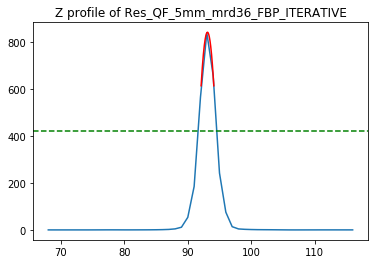

> SET NUMBER 8 : Res_QF_5mm_mrd46_FBP_ITERATIVE
> MRD : 46
 
 
fwhm_x : [1.6751647]
fwtm_x : [6.1257079]


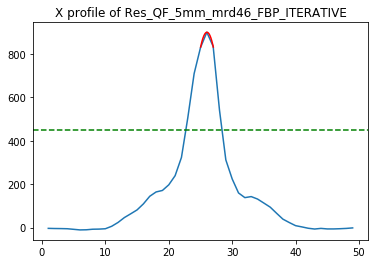

fwhm_y : [2.68514629]
fwtm_y : [5.57562649]


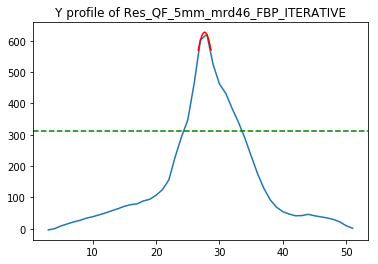

fwhm_z : [2.27907865]
fwtm_z : [4.4133727]


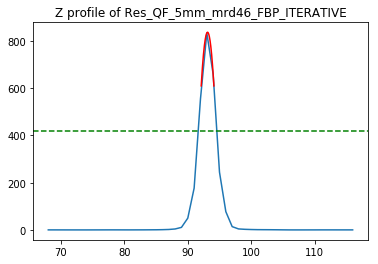

In [28]:
lista_fw=[]
n_set=0

for item in os.listdir(path): 
    string_id = str(item)
    print ('> SET NUMBER', n_set, ':', item)
    c = str(item)
    
    if mm == str(5) :
        indice_mrd = int(c[14] + c[15])
    
    if mm == str(30) :
        indice_mrd = int(c[15] + c[16])
        
    print('> MRD :', indice_mrd)
    print(' ')
    main_ris(imglist[n_set])
    
    
    n_set+=1

In [29]:
#lista_fw
unsorted_list = []
sorted_final=[]

for v in range (0,len(lista_fw)):
    unsorted_list.append(lista_fw[v][0])
    #print(lista_fw[v][0])

sorted_list = sorted(unsorted_list)
#print(sorted_list)

for c in sorted_list:   
    for v in range (0,len(lista_fw)):
        if c == lista_fw[v][0]:
            sorted_final.append(lista_fw[v])
        else:
            pass

#sorted_final

lista_x = []
lista_y = []
for i in range (0, len(sorted_final)):
    lista_x.append(sorted_final[i][0])

for j in range (1,7):  
    for i in range (0, len(sorted_final)):
        lista_y.append(sorted_final[i][j])
        
array_x = np.asanyarray(lista_x) #asse x

array_y = np.asanyarray(lista_y)
array_y = array_y.reshape(6,9) #ogni riga corrisponde a una fw, ad esempio la prima riga corrisponde a fwhm_x

> FWHM


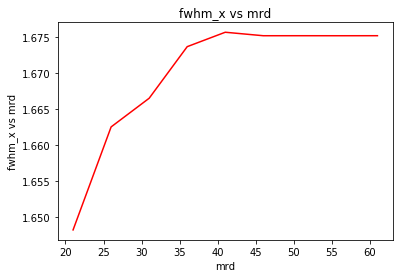

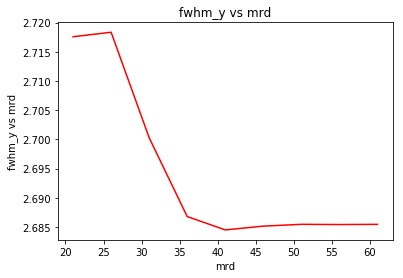

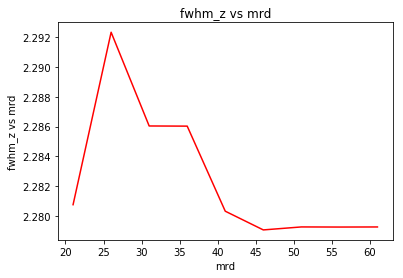

> FWTM


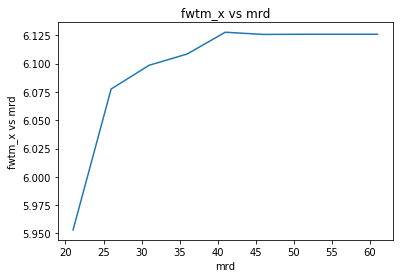

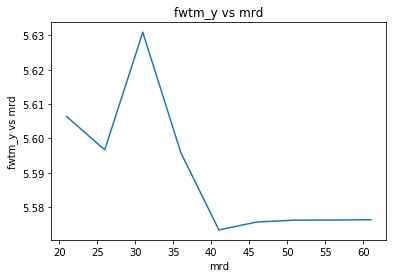

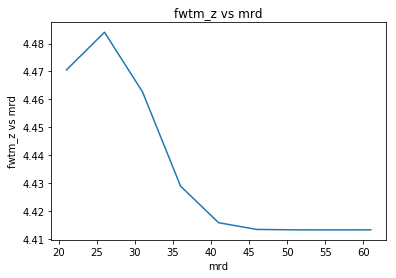

In [30]:
print('> FWHM')

plt.plot(array_x, array_y[0], color='r')
plt.xlabel('mrd')
plt.ylabel('fwhm_x vs mrd')
plt.title('fwhm_x vs mrd')
plt.show()

plt.plot(array_x, array_y[1], color='r')
plt.xlabel('mrd')
plt.ylabel('fwhm_y vs mrd')
plt.title('fwhm_y vs mrd')
plt.show()

plt.plot(array_x, array_y[2], color='r')
plt.xlabel('mrd')
plt.ylabel('fwhm_z vs mrd')
plt.title('fwhm_z vs mrd')
plt.show()

print('> FWTM')

plt.plot(array_x, array_y[3])
plt.xlabel('mrd')
plt.ylabel('fwtm_x vs mrd')
plt.title('fwtm_x vs mrd')
plt.show()

plt.plot(array_x, array_y[4])
plt.xlabel('mrd')
plt.ylabel('fwtm_y vs mrd')
plt.title('fwtm_y vs mrd')
plt.show()

plt.plot(array_x, array_y[5])
plt.xlabel('mrd')
plt.ylabel('fwtm_z vs mrd')
plt.title('fwtm_z vs mrd')
plt.show()